#**Marketing Campaign Data**

### Description

This dataset contains demographic data, customer purchasing behavior, and marketing campaign responses. It's ideal for projects involving sales conversions, customer segmentation, and basic statistical analysis.

---

### Project Overview

Analyze how customer demographics, lifestyle, and past purchases affect their likelihood to respond to marketing campaigns. Discover actionable insights that help optimize sales funnels and marketing efforts.

---

### Problem Statement

> “What drives customers to convert in a marketing campaign? How can customer data be used to target high-value segments and optimize ROI?”
>

Attributes

---

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

---

Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

---

Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

---

Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

# **Data Exploration & Cleaning**

- Loading libraries and dataset and basic overview.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
sns.set(style = "whitegrid")

In [ ]:
pd.set_option("display.max_columns",None)
df = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv",sep = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- Handle missing values, incorrect data types, outliers


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.duplicated().sum()

np.int64(0)

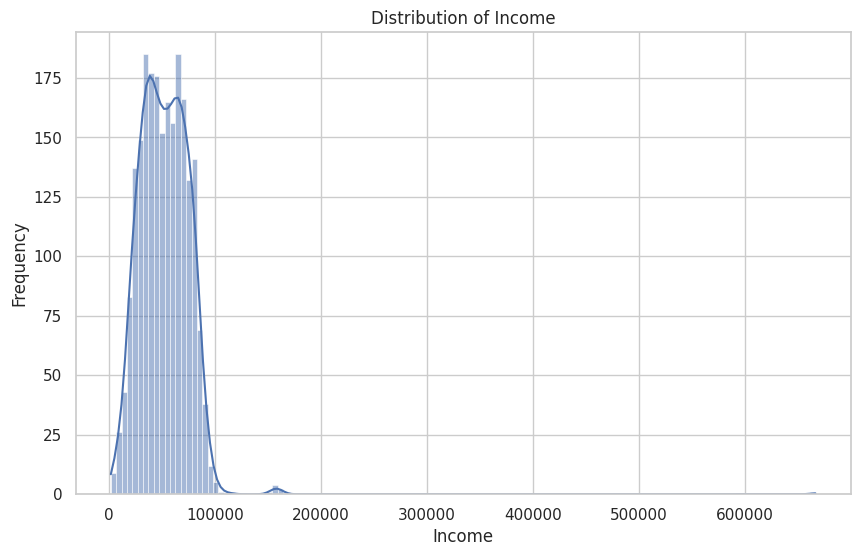

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df,x = 'Income',kde =True)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Income")
plt.show()

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

- Convert date columns into usable features (e.g., customer tenure)


In [ ]:
#  'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

#'Customer_Tenure_Days' from the most recent date
max_date = df['Dt_Customer'].max()
df['Customer_Tenure_Days'] = (max_date - df['Dt_Customer']).dt.days

#  tenure in months and years
df['Customer_Tenure_Months'] = df['Customer_Tenure_Days'] // 30
df['Customer_Tenure_Years'] = df['Customer_Tenure_Days'] // 365


df[['Dt_Customer', 'Customer_Tenure_Days', 'Customer_Tenure_Months', 'Customer_Tenure_Years']].head()

,Dt_Customer,Customer_Tenure_Days,Customer_Tenure_Months,Customer_Tenure_Years
0,2012-09-04,663,22,1
1,2014-03-08,113,3,0
2,2013-08-21,312,10,0
3,2014-02-10,139,4,0
4,2014-01-19,161,5,0


- Derive new metrics (e.g., total spent, average response rate) and handelling outliers

In [ ]:
df['Age'] = datetime.now().year - df["Year_Birth"]

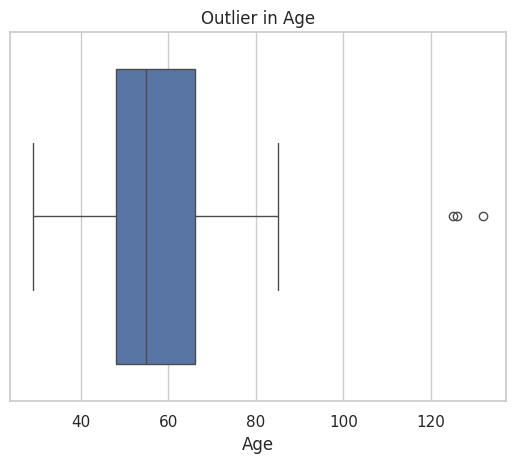

In [ ]:
sns.boxplot(data = df,x ="Age")
plt.title("Outlier in Age")
plt.show()

In [ ]:
# Compute IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Print the outlier values

outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure_Days,Customer_Tenure_Months,Customer_Tenure_Years,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,276,9,0,125
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,43,1,0,132
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,276,9,0,126


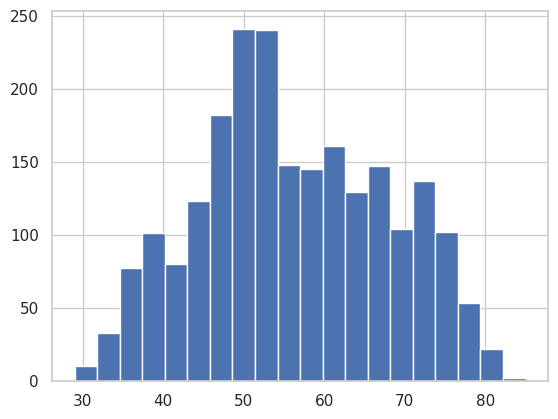

In [ ]:
# Keep only non-outlier rows
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
plt.hist(df["Age"],bins = 20)
plt.show()

In [ ]:
# Total amount spent
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spent'] = df[spend_cols].sum(axis=1)

# Total children
df["Total Children"] = df['Kidhome']+df['Teenhome']

# Total campaign responses
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Campaign_Accepted'] = df[campaign_cols].sum(axis=1)

#Average campaign response rate
df['Avg_Campaign_Response_Rate'] = df['Total_Campaign_Accepted'] / len(campaign_cols)

#customer tenure
df['Customer_Tenure'] = (max_date - df['Dt_Customer']).dt.days


In [ ]:
# Use IQR method for 'Income' and 'Total_Spent'
for col in ['Income', 'Total_Spent']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Tenure_Days', 'Customer_Tenure_Months',
       'Customer_Tenure_Years', 'Age', 'Total_Spent', 'Total Children',
       'Total_Campaign_Accepted', 'Avg_Campaign_Response_Rate',
       'Customer_Tenure'],
      dtype='object')

#**Exploratory & Statistical Analysis**

- Segment customers by age, income, education, or family status

In [ ]:
df['Age_Group'] = pd.cut(df["Age"],bins = [30,45,60,75,90],labels =  ["<30","30-45","45-60","60+"])
df["Age_Group"].value_counts()

,count
Age_Group,
30-45,1030
45-60,676
<30,417
60+,107


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,579
Single,479
Divorced,231
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,485
Master,370
2n Cycle,201
Basic,54


Visualize spending patterns and campaign response by segment

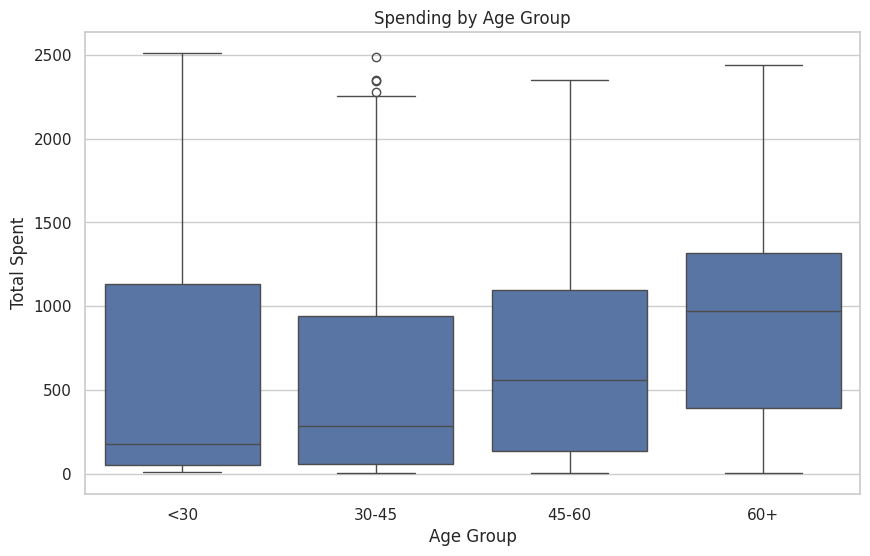

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "Age_Group", y='Total_Spent', data=df)
plt.title("Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spent")
plt.show()

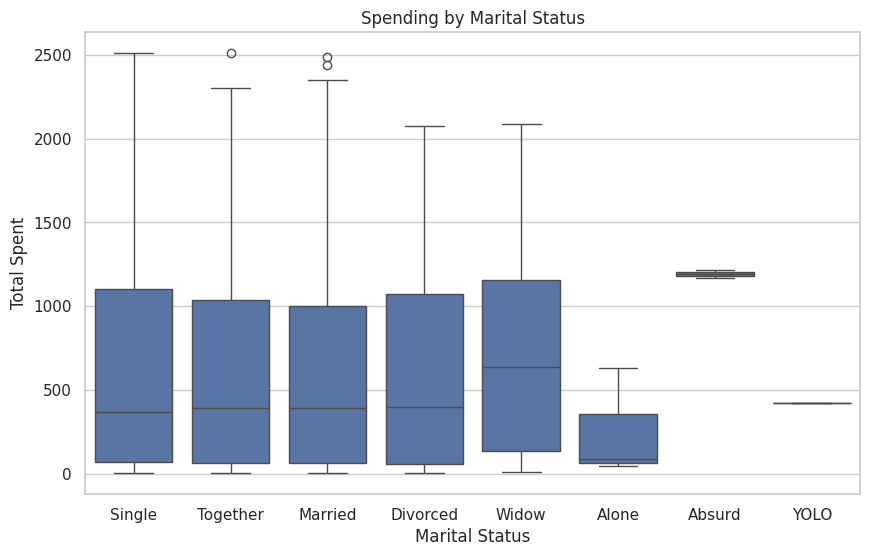

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Marital_Status', y='Total_Spent', data=df)
plt.title("Spending by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Spent")
plt.show()

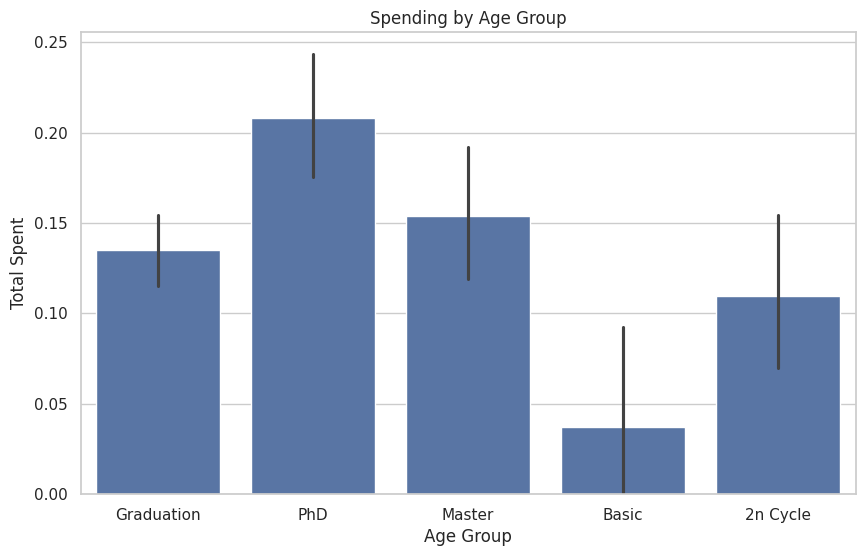

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Education', y='Response', data=df)
plt.title("Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spent")
plt.show()

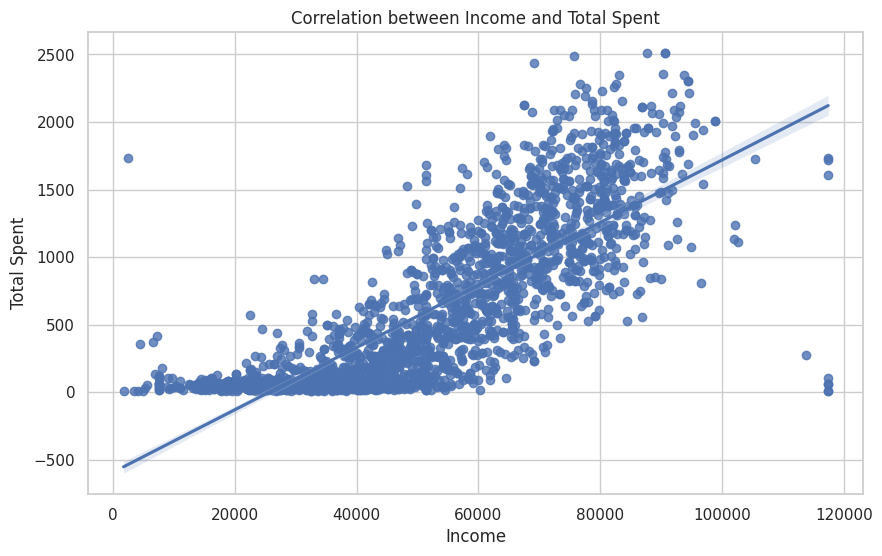

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'Income',y= 'Total_Spent',data =df)
plt.title("Correlation between Income and Total Spent")
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

Analyze campaign effectiveness (conversion rates by group)

In [ ]:
conversion_rates = df.groupby('Age_Group')['Response'].mean()
print(conversion_rates)

Age_Group
<30      0.189448
30-45    0.135922
45-60    0.128698
60+      0.242991
Name: Response, dtype: float64


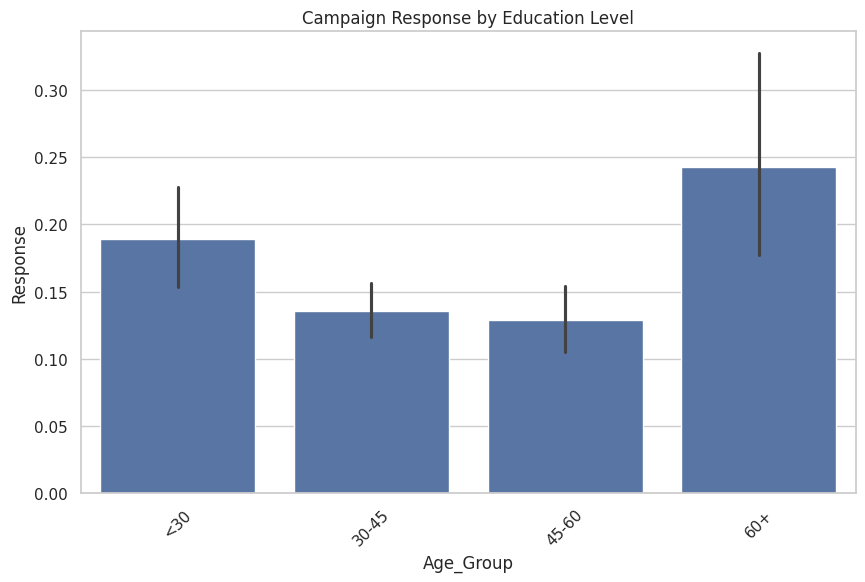

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Age_Group', y='Response', data=df)
plt.title('Campaign Response by Education Level')
plt.xticks(rotation=45)
plt.show()

In [ ]:
conversion_rates = df.groupby('Marital_Status')['Response'].mean()
print(conversion_rates)

Marital_Status
Absurd      0.500000
Alone       0.333333
Divorced    0.207792
Married     0.113426
Single      0.221294
Together    0.103627
Widow       0.246753
YOLO        0.500000
Name: Response, dtype: float64


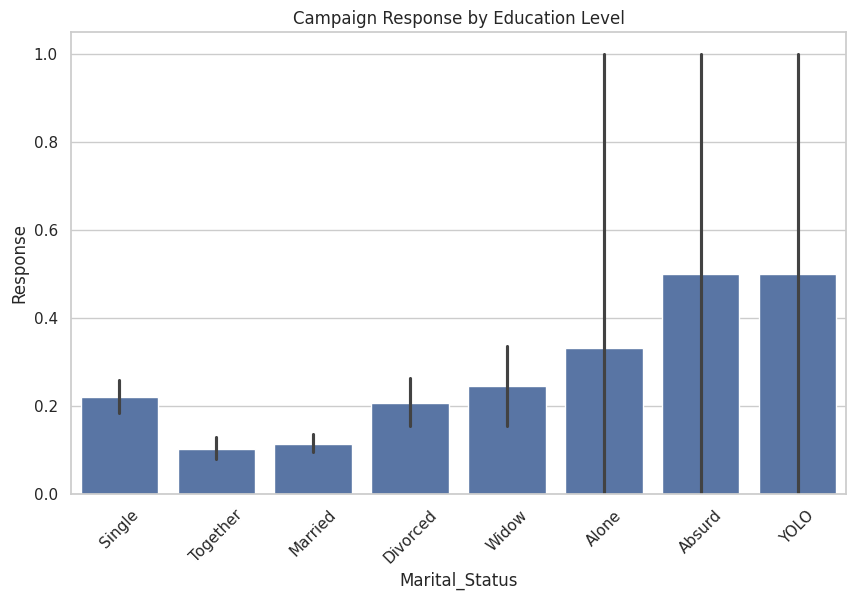

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Marital_Status', y='Response', data=df)
plt.title('Campaign Response by Education Level')
plt.xticks(rotation=45)
plt.show()


Calculate correlations between marketing attributes and conversion

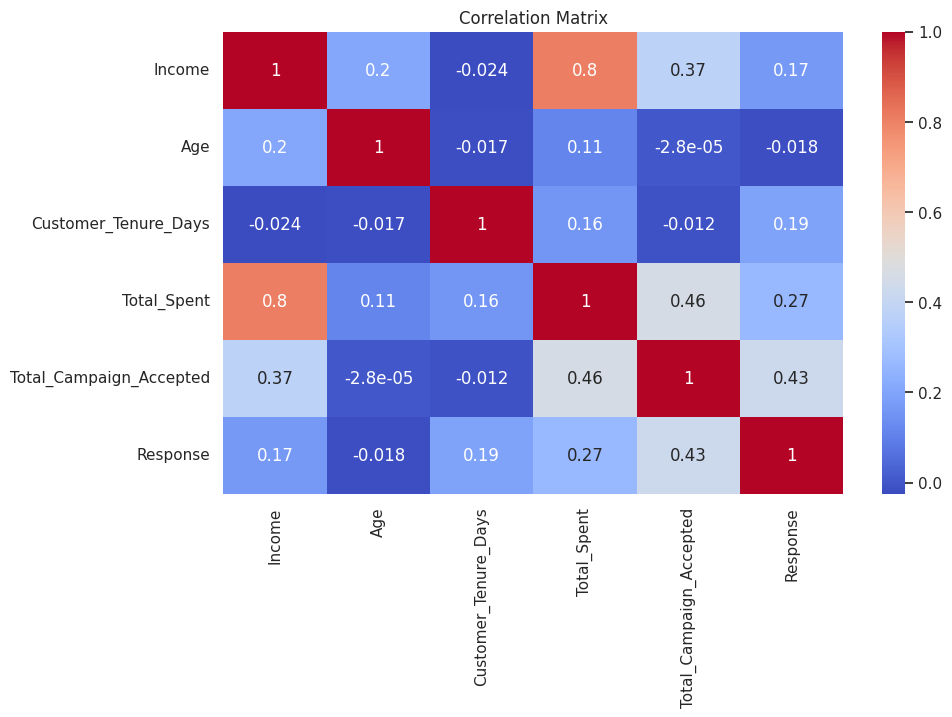

In [ ]:
plt.figure(figsize = (10,6))
corr_matrix = df[['Income','Age','Customer_Tenure_Days','Total_Spent','Total_Campaign_Accepted','Response']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

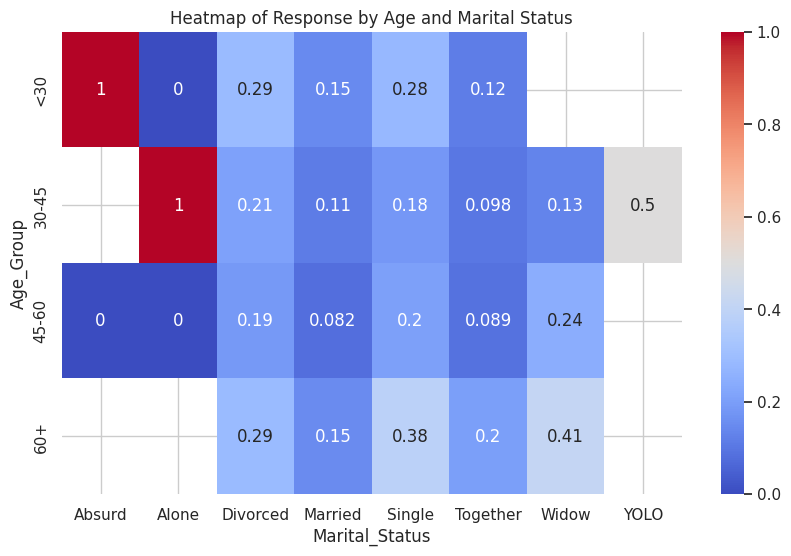

In [ ]:
plt.figure(figsize = (10,6))
pivot = df.pivot_table(values='Response', index='Age_Group', columns='Marital_Status', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Heatmap of Response by Age and Marital Status")
plt.show()

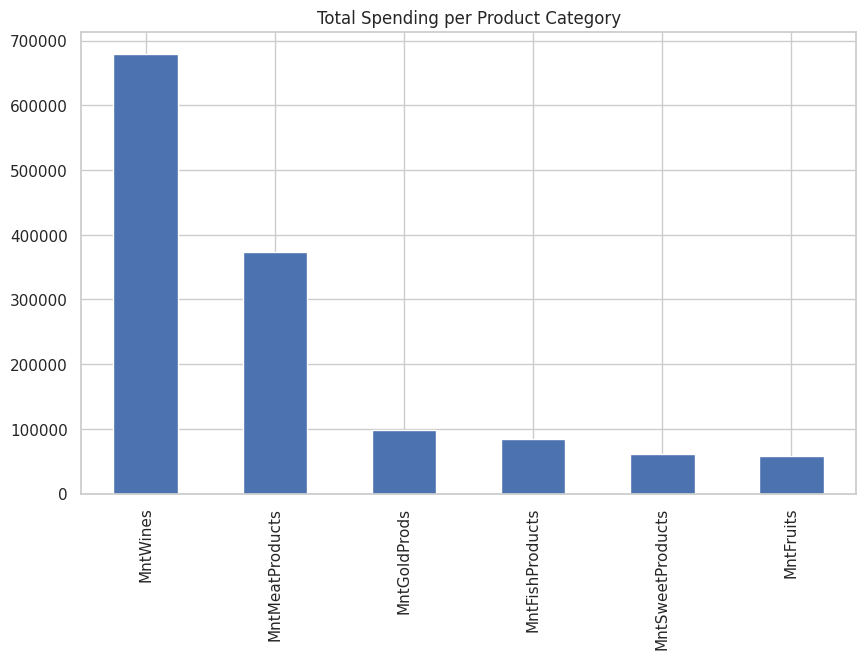

In [ ]:
plt.figure(figsize = (10,6))
product_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df[product_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Spending per Product Category")
plt.show()

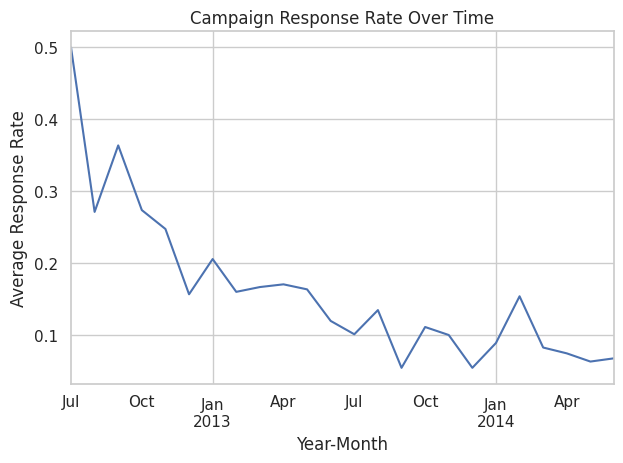

In [ ]:
df['YearMonth'] = df['Dt_Customer'].dt.to_period('M')
monthly_response = df.groupby('YearMonth')['Response'].mean()

monthly_response.plot(kind='line')
plt.title("Campaign Response Rate Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Response Rate")
plt.tight_layout()
plt.show()


# T-test

In [ ]:
from scipy.stats import ttest_ind

responders = df[df['Response'] == 1]['Income']
non_responders = df[df['Response'] == 0]['Income']

t_stat, p_value = ttest_ind(responders, non_responders)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 7.99232704177386
P-value: 2.1015161520867775e-15


P-value < 0.05

This is statistically significant — we reject the null hypothesis.

Conclusion:
Customers who responded to the marketing campaign have a significantly different income (most likely higher) compared to those who did not respond.



In [ ]:
responders = df[df['Response'] == 1]['Age']
non_responders = df[df['Response'] == 0]['Age']

t_stat, p_value = ttest_ind(responders, non_responders)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.8711707978428117
P-value: 0.38375446666786295


P-value > 0.05

This is not statistically significant — we fail to reject the null hypothesis.

Conclusion:
There is no statistically significant difference in Age between customers who responded to the campaign and those who didn’t.

# Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming data is already loaded and preprocessed
# Select features for clustering
features = df[['Income', 'Total_Spent', 'Customer_Tenure']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)

# Prepare data for logistic regression
X = df[['Income', 'Total_Spent', 'Customer_Tenure', 'Cluster']]
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the conversion probability on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Cluster counts:
 Cluster
0    1221
2     535
1     481
Name: count, dtype: int64
Accuracy: 0.8370535714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       376
           1       0.43      0.04      0.08        72

    accuracy                           0.84       448
   macro avg       0.64      0.52      0.49       448
weighted avg       0.78      0.84      0.78       448



In [ ]:
# Total customers
total_customers = df.shape[0]

# Number who visited website
visited = df[df['NumWebVisitsMonth'] > 0].shape[0]

# Number who accepted at least one campaign
accepted_campaign = df[
    (df['AcceptedCmp1'] == 1) | (df['AcceptedCmp2'] == 1) |
    (df['AcceptedCmp3'] == 1) | (df['AcceptedCmp4'] == 1) |
    (df['AcceptedCmp5'] == 1)
].shape[0]

# Number who responded (converted)
converted = df[df['Response'] == 1].shape[0]

print(f"Total Customers: {total_customers}")
print(f"Visited Website: {visited} ({visited / total_customers:.2%})")
print(f"Accepted Campaign: {accepted_campaign} ({accepted_campaign / total_customers:.2%})")
print(f"Converted: {converted} ({converted / total_customers:.2%})")


Total Customers: 2237
Visited Website: 2226 (99.51%)
Accepted Campaign: 462 (20.65%)
Converted: 334 (14.93%)


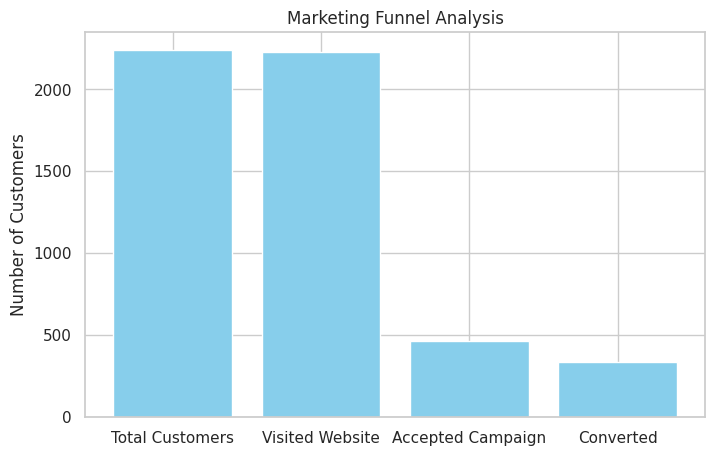

In [ ]:
import matplotlib.pyplot as plt

stages = ['Total Customers', 'Visited Website', 'Accepted Campaign', 'Converted']
counts = [total_customers, visited, accepted_campaign, converted]

plt.figure(figsize=(8,5))
plt.bar(stages, counts, color='skyblue')
plt.title('Marketing Funnel Analysis')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
visit_to_accept = accepted_campaign / visited if visited else 0
accept_to_convert = converted / accepted_campaign if accepted_campaign else 0

print(f"Conversion Rate (Visit → Accept): {visit_to_accept:.2%}")
print(f"Conversion Rate (Accept → Convert): {accept_to_convert:.2%}")


Conversion Rate (Visit → Accept): 20.75%
Conversion Rate (Accept → Convert): 72.29%
